In [7]:
!python --version  

Python 3.7.10


In [1]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.8.1+cu111 True


In [9]:
torch.version.cuda

'11.1'

In [10]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [5]:
!git clone https://github.com/jinfagang/yolov7

fatal: destination path 'yolov7' already exists and is not an empty directory.


In [12]:
cd ..

/root/Desktop/yolov7


In [36]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 14608, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 14608 (delta 5), reused 17 (delta 2), pack-reused 14583
Receiving objects: 100% (14608/14608), 5.97 MiB | 8.77 MiB/s, done.
Resolving deltas: 100% (10560/10560), done.


In [37]:
!python -m pip install -e detectron2

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Obtaining file:///root/Desktop/yolov7/detectron2


  Running setup.py develop for detectron2


In [15]:
!pip install alfred-py

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
     |████████████████████████████████| 1.8 MB 89 kB/s eta 0:00:011
     |████████████████████████████████| 757 kB 710 kB/s eta 0:00:01
     |████████████████████████████████| 58 kB 972 kB/s eta 0:00:011
     |████████████████████████████████| 60 kB 139 kB/s eta 0:00:011
     |████████████████████████████████| 75 kB 156 kB/s eta 0:00:011
     |████████████████████████████████| 45 kB 99 kB/s eta 0:00:0111
  Created wheel for alfred-py: filename=alfred_py-3.0.1-py3-none-any.whl size=1873809 sha256=fefadc51c001753805c2aed15b41de4d6119f756ea88163de4b43bd83026f8b6
  Stored in directory: /root/.cache/pip/wheels/53/ed/05/a8573a4f6d70e303d7f02d7a859b6f1843990aa0cb0a949699
Successfully built alfred-py


In [16]:
!pip install nbnb

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
     |████████████████████████████████| 43 kB 122 kB/s eta 0:00:011
     |████████████████████████████████| 237 kB 648 kB/s eta 0:00:01
     |████████████████████████████████| 51 kB 301 kB/s eta 0:00:011
  Created wheel for nbnb: filename=nbnb-0.1.4-py3-none-any.whl size=52337 sha256=791b7e2ba17035e5017b508420122747b251446d4a19a2c8057f177270a62a4e
  Stored in directory: /root/.cache/pip/wheels/dc/56/f3/eab224da6e5902b61578dd09bc494a878751c3c1f05005c649
Successfully built nbnb
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.0
    Uninstalling typing-extensions-3.10.0.0:
      Successfully uninstalled typing-extensions-3.10.0.0


## Download the dataset

In [13]:
!pip install wget

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=d493da7dca074739c7d751d13f201840f11be7da3d029ac29299dad027e47a15
  Stored in directory: /root/.cache/pip/wheels/dc/31/7f/a4a4cbe7ae34f1a38f54f2a9fc77c06d20b10d1dc8557eb191
Successfully built wget


In [ ]:
# download, decompress the data
import wget
wget.download('https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip')

In [ ]:
!nvidia-smi

In [2]:
import os
os.path.abspath('.')

'/root/Desktop'

In [3]:
cd yolov7

/root/Desktop/yolov7


In [67]:
import zipfile
with zipfile.ZipFile("../balloon_dataset.zip","r") as zip_ref:
    zip_ref.extractall("balloon_dataset")

In [13]:
#if your dataset is in COCO format, this cell can be replaced by the following three lines:
#from detectron2.data.datasets import register_coco_instances
#register_coco_instances("my_dataset_train", {}, "json_annotation_train.json", "path/to/image/dir")
#register_coco_instances("my_dataset_val", {}, "json_anntotation_val.json", "path/to/image/dir")

In [4]:
import json
def get_balloon_dicts(img_dir):
    json_file = os.path.join(img_dir, "via_region_data.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)
        
    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}
        
        filename = os.path.join(img_dir, v["filename"])
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
        
        annos = v["regions"]
        objs = []
        for _, anno in annos.items():
            assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px,py)]
            poly = [p for x in poly for p in x]
            
            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": 0,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

In [10]:
# notice file route
import detectron2

In [11]:
help(detectron2)

Help on package detectron2:

NAME
    detectron2 - # Copyright (c) Facebook, Inc. and its affiliates.

PACKAGE CONTENTS
    _C
    checkpoint (package)
    config (package)
    data (package)
    engine (package)
    evaluation (package)
    export (package)
    layers (package)
    model_zoo (package)
    modeling (package)
    projects (package)
    setup
    solver (package)
    structures (package)
    tests (package)
    tools (package)
    tracking (package)
    utils (package)

VERSION
    0.6

FILE
    /root/Desktop/yolov7/detectron2/__init__.py




In [5]:
from detectron2.data import DatasetCatalog,MetadataCatalog
# for d in ["train", "val"]:
#     DatasetCatalog.register("balloon_" + d, lambda d=d:get_balloon_dicts("balloon_dataset/balloon/" + d))
#     MetadataCatalog.get("balloon_" + d).set(thing_classes=["balloon"])

balloon_metadata = MetadataCatalog.get("balloon_train")

{'file_name': './balloon_dataset/balloon/train/1297451346_5b92bdac08_b.jpg', 'image_id': 45, 'height': 1024, 'width': 768, 'annotations': [{'bbox': [471, 358, 671, 632], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'segmentation': [[612.5, 365.5, 626.5, 375.5, 643.5, 390.5, 656.5, 403.5, 668.5, 420.5, 671.5, 449.5, 671.5, 479.5, 661.5, 514.5, 643.5, 541.5, 623.5, 566.5, 599.5, 589.5, 575.5, 607.5, 556.5, 614.5, 544.5, 616.5, 542.5, 622.5, 544.5, 627.5, 538.5, 632.5, 533.5, 625.5, 537.5, 620.5, 537.5, 615.5, 523.5, 609.5, 512.5, 598.5, 502.5, 579.5, 488.5, 549.5, 474.5, 506.5, 471.5, 476.5, 471.5, 451.5, 477.5, 425.5, 490.5, 399.5, 505.5, 381.5, 526.5, 368.5, 544.5, 360.5, 566.5, 358.5, 589.5, 358.5, 612.5, 365.5]], 'category_id': 0}, {'bbox': [318, 456, 503, 681], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'segmentation': [[370.5, 464.5, 390.5, 457.5, 415.5, 456.5, 440.5, 464.5, 457.5, 472.5, 469.5, 484.5, 472.5, 490.5, 473.5, 500.5, 478.5, 519.5, 486.5, 542.5, 493.5, 561.5, 503.5, 581.5, 494.5, 606.5

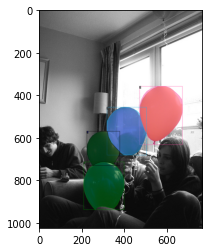

In [7]:
# To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the train
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
import os
from detectron2.structures.boxes import BoxMode
from detectron2.utils.visualizer import Visualizer
dataset_dicts = get_balloon_dicts("./balloon_dataset/balloon/train")
#print(dataset_dicts)
for d in random.sample(dataset_dicts, 1):
#    print(d)
    img = cv2.imread(d["file_name"])
#   print(img)
    visualizer = Visualizer(img[:, :,::-1], metadata=balloon_metadata, scale=1)
#    print(visualizer)
    out = visualizer.draw_dataset_dict(d)
#    print(out.get_image()[:, :, ::-1].shape)
#    cv2.imshow('image',out.get_image()[:, :, ::-1])
    plt.imshow(out.get_image()[:, :, ::-1],'gray')

In [56]:
import os 
os.path.abspath('.')

'/root/Desktop/yolov7'

# Train Instance Segmentation Model

In [8]:
!pip install wandb

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
     |████████████████████████████████| 1.9 MB 194 kB/s eta 0:00:01
     |████████████████████████████████| 168 kB 233 kB/s eta 0:00:01
     |████████████████████████████████| 182 kB 11 kB/s eta 0:00:015
     |████████████████████████████████| 63 kB 26 kB/s eta 0:00:0111
     |████████████████████████████████| 140 kB 97 kB/s eta 0:00:011
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=74fea52c6316c93597b8aadbfc915d68511ac5872dc463291ba4ba4028a0fc78
  Stored in directory: /root/.cache/pip/wheels/0d/e2/ba/9339ab44963cfb977aa1056707cbcdaf238f72e8995695dddf
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8784 sha256=3e2f617df2d79427949ec3e1064f88b8df1d667d8a402a8857fde8e9bef8aaf1
  Stored in directory: /root/.cache/pip/wheels/32/da/c2/cb31f0a788c8190fa7a3a6b21515f3a7ee22b59e84344cae9a
Successfully built promise pathtools
  Attempting uninstall: urllib3
    Found 

In [9]:
!python my_image_segmentation_training.py --config-file configs/balloon_instance_segment/yolomask.yaml --num-gpus 0

Install mish-cuda to speed up training and inference. More importantly, replace the naive Mish with MishCuda will give a ~1.5G memory saving during training.
[11/16 07:21:07 detectron2]: Rank of current process: 0. World size: 1
[11/16 07:21:08 detectron2]: Environment info:
----------------------  ----------------------------------------------------------------------------------
sys.platform            linux
Python                  3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]
numpy                   1.20.3
detectron2              0.6 @/root/Desktop/yolov7/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   3.7
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.8.1+cu111 @/root/miniconda3/envs/myconda/lib/python3.7/site-packages/torch
PyTorch debug build     False
GPU available           Yes
GPU 0                   Tesla K80 (arch=3.7)
Driver version          470.94
CUDA_HOME               /usr/local/cuda
Pillow          

  # proposals are part of the dataset_dicts, and take a lot of RAM
  NUM_WORKERS: 1

[11/16 07:21:08 detectron2]: Running with full config:
CUDNN_BENCHMARK: false
DATALOADER:
  ASPECT_RATIO_GROUPING: true
  FILTER_EMPTY_ANNOTATIONS: true
  NUM_WORKERS: 1
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  CLASS_NAMES: []
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: []
  PROPOSAL_FILES_TRAIN: []
  TEST:
  - balloon_val
  TRAIN:
  - balloon_train
GLOBAL:
  HACK: 1.0
INPUT:
  COLOR_JITTER:
    BRIGHTNESS: false
    LIGHTING: false
    SATURATION: false
  CROP:
    ENABLED: false
    SIZE:
    - 0.9
    - 0.9
    TYPE: relative_range
  DISTORTION:
    ENABLED: false
    EXPOSURE: 1.5
    HUE: 0.1
    SATURATION: 1.5
  FORMAT: BGR
  GRID_MASK:
    ENABLED: false
    MODE: 1
    PROB: 0.3
    USE_HEIGHT: true
    USE_WIDTH: true
  INPUT_SIZE:
  - 640
  - 640
  JITTER_CROP:
    ENABLED: false
    JITTER_RATIO: 0.3
  MAS

[11/16 07:21:08 detectron2]: Full config saved to output/coco_yolomask/config.yaml
[11/16 07:21:08 d2.utils.env]: Using a generated random seed 8727520
[11/16 07:21:08 d2.engine.defaults]: Auto-scaling the config to batch_size=2, learning_rate=0.0001125, max_iter=8000, warmup=12000.
07:21:09 11.16 INFO yolomask.py:86]: YOLO.ANCHORS: [[142, 110], [192, 243], [459, 401], [36, 75], [76, 55], [72, 146], [12, 16], [19, 36], [40, 28]]
07:21:09 11.16 INFO yolomask.py:90]: backboneshape: [64, 128, 256, 512], size_divisibility: 32
[[142, 110], [192, 243], [459, 401], [36, 75], [76, 55], [72, 146], [12, 16], [19, 36], [40, 28]]
[11/16 07:21:13 d2.data.build]: Removed 0 images with no usable annotations. 61 images left.
[11/16 07:21:13 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|  balloon   | 255          |
|            |              |
[11/16 07:21:13 d2.data.build]: Using training sampler TrainingSampler
[11/16 0

[11/16 07:26:30 d2.utils.events]:  eta: 1:13:45  iter: 519  total_loss: 5101  loss_box: 1.069  loss_obj_pos: 2.701  loss_obj_neg: 5094  loss_cls: 1.64  loss_orien_pos: 1.139  loss_orien_neg: 0.4969  time: 0.6089  data_time: 0.0279  lr: 3.5067e-08  max_mem: 1736M
[11/16 07:26:43 d2.utils.events]:  eta: 1:13:33  iter: 539  total_loss: 4923  loss_box: 1.134  loss_obj_pos: 2.358  loss_obj_neg: 4906  loss_cls: 1.716  loss_orien_pos: 1.15  loss_orien_neg: 0.427  time: 0.6091  data_time: 0.0333  lr: 3.4973e-08  max_mem: 1736M
[11/16 07:26:55 d2.utils.events]:  eta: 1:13:31  iter: 559  total_loss: 4767  loss_box: 1.825  loss_obj_pos: 4.538  loss_obj_neg: 4743  loss_cls: 2.694  loss_orien_pos: 2.068  loss_orien_neg: 1.112  time: 0.6097  data_time: 0.0346  lr: 3.4879e-08  max_mem: 1736M
[11/16 07:27:07 d2.utils.events]:  eta: 1:13:05  iter: 579  total_loss: 4277  loss_box: 0.9842  loss_obj_pos: 3.405  loss_obj_neg: 4272  loss_cls: 1.689  loss_orien_pos: 1.3  loss_orien_neg: 0.6544  time: 0.6085 

[11/16 07:32:45 d2.utils.events]:  eta: 1:06:49  iter: 1139  total_loss: 2517  loss_box: 1.213  loss_obj_pos: 4.132  loss_obj_neg: 2503  loss_cls: 2.207  loss_orien_pos: 1.422  loss_orien_neg: 0.6774  time: 0.6061  data_time: 0.0277  lr: 3.2161e-08  max_mem: 1736M
[11/16 07:32:57 d2.utils.events]:  eta: 1:06:39  iter: 1159  total_loss: 2194  loss_box: 1.149  loss_obj_pos: 3.894  loss_obj_neg: 2187  loss_cls: 1.74  loss_orien_pos: 1.23  loss_orien_neg: 0.621  time: 0.6062  data_time: 0.0379  lr: 3.2067e-08  max_mem: 1736M
[11/16 07:33:09 d2.utils.events]:  eta: 1:06:22  iter: 1179  total_loss: 2438  loss_box: 1.248  loss_obj_pos: 5.136  loss_obj_neg: 2430  loss_cls: 2.19  loss_orien_pos: 1.354  loss_orien_neg: 0.614  time: 0.6059  data_time: 0.0143  lr: 3.1973e-08  max_mem: 1736M
[11/16 07:33:22 d2.utils.events]:  eta: 1:06:11  iter: 1199  total_loss: 2420  loss_box: 1.522  loss_obj_pos: 4.501  loss_obj_neg: 2398  loss_cls: 2.211  loss_orien_pos: 1.533  loss_orien_neg: 0.7675  time: 0.6

[11/16 07:38:50 d2.utils.events]:  eta: 1:01:37  iter: 1739  total_loss: 1634  loss_box: 1.484  loss_obj_pos: 4.404  loss_obj_neg: 1621  loss_cls: 1.971  loss_orien_pos: 1.616  loss_orien_neg: 0.6444  time: 0.6064  data_time: 0.0212  lr: 2.9348e-08  max_mem: 1736M
[11/16 07:39:02 d2.utils.events]:  eta: 1:01:27  iter: 1759  total_loss: 1674  loss_box: 1.184  loss_obj_pos: 4.558  loss_obj_neg: 1658  loss_cls: 2.154  loss_orien_pos: 1.354  loss_orien_neg: 0.5932  time: 0.6066  data_time: 0.0410  lr: 2.9254e-08  max_mem: 1736M
[11/16 07:39:14 d2.utils.events]:  eta: 1:01:15  iter: 1779  total_loss: 1545  loss_box: 0.8755  loss_obj_pos: 4.021  loss_obj_neg: 1537  loss_cls: 1.514  loss_orien_pos: 1.041  loss_orien_neg: 0.4408  time: 0.6064  data_time: 0.0219  lr: 2.9161e-08  max_mem: 1736M
^C


# Test Model

In [6]:
!python mydemo.py --config-file output/coco_yolomask/config.yaml --input 3.jpg -c 0.12 --output detectasd --opts MODEL.WEIGHTS output/coco_yolomask/model_final.pth

Install mish-cuda to speed up training and inference. More importantly, replace the naive Mish with MishCuda will give a ~1.5G memory saving during training.
[11/16 07:16:57 detectron2]: Arguments: Namespace(confidence_threshold=0.12, config_file='output/coco_yolomask/config.yaml', input='3.jpg', nms_threshold=0.6, opts=['MODEL.WEIGHTS', 'output/coco_yolomask/model_final.pth'], output='detectasd', wandb_entity=None, wandb_project=None, webcam=False)
07:16:58 11.16 INFO yolomask.py:86]: YOLO.ANCHORS: [[142, 110], [192, 243], [459, 401], [36, 75], [76, 55], [72, 146], [12, 16], [19, 36], [40, 28]]
07:16:58 11.16 INFO yolomask.py:90]: backboneshape: [64, 128, 256, 512], size_divisibility: 32
[[142, 110], [192, 243], [459, 401], [36, 75], [76, 55], [72, 146], [12, 16], [19, 36], [40, 28]]
[11/16 07:17:00 fvcore.common.checkpoint]: [Checkpointer] Loading from output/coco_yolomask/model_final.pth ...
[11/16 07:17:00 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Nam

416 416 600
confidence thresh:  0.12
image after transform:  (416, 555, 3)
cost: 0.23243308067321777, fps: 4.30231358248837
Seems iteration done. bye~
